In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import pandas as pd

## Assumptions

- Construction term: 5 years
- Concession term: 30 years
- CAPEX: USD 1,325 million
- OPEX: USD 14.73 million (per year)
- Reinvestments: USD 2.18 million (per year)
- Government financial support: USD 372.2 million (during construction)
- Government financial compensation: USD 13.95 million (per year)
- Average tariff: USD 8.12
- WAAC: 7.56%
- Risk-free rate: 3.20%

In [2]:
# Create Dataframes
income_statement = pd.DataFrame(columns = ['Revenue', 'SG&A','EBITDA', 'Depreciation', 'EBIT', 'Tax', 'NetIncome'])
cash_flow = pd.DataFrame(columns = ['NetIncome', 'Depreciation', 'Change_NWC', 'CashFromOperations', 'CashFromInvesting', 'FreeCashFlow'])
revenue_reference = pd.DataFrame(columns = ['growth', 'Revenue'])

# Fixed numbers
income_statement['SG&A'] = [0.0]*5 + [-14279.0]*30
income_statement['Depreciation'] = [0.0]*5 + [-44184.0]*30
cash_flow['Depreciation'] = [0.0]*5 + [-44184.0]*30
cash_flow['CashFromInvesting'] = [-265105.0] + [-190665.0] + [-141039.0] + [-165852.0] + [-190665.0] + [11761.0]*30 # Soma 5 primeiras observações = 1.325 - 372,2 (investimento - apoio do governo) , Durante operação: 13,95 - 2,18 (Apoio do governo - reinvestimento)

# Assumptions
wacc = 0.0756
riskfree = 0.0320
change_nwc = 0.04 # 4% of revenue
tax_rate = 0.34

revenue_reference['growth'] = [0]*5 + [1.05]*10 + [1.035]*20  
revenue_volatility = 0.0316 # From paper (volatility of Bahia GDP
revenue_1y = 84650.0


In [3]:
# Revenue
revenue_reference['Revenue'] = 0
revenue_reference.loc[5, 'Revenue'] = revenue_1y

# Reference revenue (predicted)
for i in range(6, len(revenue_reference)):
    revenue_reference.loc[i, 'Revenue'] = revenue_reference.loc[i-1, 'Revenue'] * revenue_reference.loc[i, 'growth']

C:\Users\FapesbAPP0043 2023\AppData\Local\Temp\ipykernel_19632\174809592.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '88882.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  revenue_reference.loc[i, 'Revenue'] = revenue_reference.loc[i-1, 'Revenue'] * revenue_reference.loc[i, 'growth']


## Static NPV

In [4]:
# Static NPV

income_statement['Revenue'] = revenue_reference['Revenue']
income_statement['EBITDA'] = income_statement['Revenue'] + income_statement['SG&A']
income_statement['EBIT'] = income_statement['EBITDA'] + income_statement['Depreciation']
income_statement['Tax'] = -income_statement['EBIT'] * tax_rate
income_statement['NetIncome'] = income_statement['EBIT'] + income_statement['Tax']

cash_flow['NetIncome'] = income_statement['NetIncome']
cash_flow['Change_NWC'] = -income_statement['Revenue'].diff().fillna(0) * change_nwc
# Revert NWC in last year
cash_flow.loc[34, 'Change_NWC'] = -cash_flow['Change_NWC'].sum()

cash_flow['CashFromOperations'] = cash_flow['NetIncome'] - cash_flow['Depreciation'] + cash_flow['Change_NWC']
cash_flow['FreeCashFlow'] = cash_flow['CashFromOperations'] + cash_flow['CashFromInvesting']

npf.npv(wacc, cash_flow['FreeCashFlow'])

85636.9883220502

In [5]:
cash_flow

,NetIncome,Depreciation,Change_NWC,CashFromOperations,CashFromInvesting,FreeCashFlow
0,0.000000,0.0,-0.000000,0.000000,-265105.0,-265105.000000
1,0.000000,0.0,-0.000000,0.000000,-190665.0,-190665.000000
2,0.000000,0.0,-0.000000,0.000000,-141039.0,-141039.000000
3,0.000000,0.0,-0.000000,0.000000,-165852.0,-165852.000000
4,0.000000,0.0,-0.000000,0.000000,-190665.0,-190665.000000
5,17283.420000,-44184.0,-3386.000000,58081.420000,11761.0,69842.420000
6,20076.870000,-44184.0,-169.300000,64091.570000,11761.0,75852.570000
7,23009.992500,-44184.0,-177.765000,67016.227500,11761.0,78777.227500
8,26089.771125,-44184.0,-186.653250,70087.117875,11761.0,81848.117875
9,29323.538681,-44184.0,-195.985912,73311.552769,11761.0,85072.552769


## Monte Carlo Simulation of NPV

In [ ]:
### Monte Carlo Simulation
years = 30
n_simulations = 1000

# Simulate GBM paths
S = np.zeros((n_simulations, years))
S[:, 0] = revenue_1y
dt = 1


for i in range(1, years):
    Z = np.random.standard_normal(n_simulations)  # M standard normal random variables
    S[:, i] = S[:, i - 1] * np.exp((revenue_reference['growth'].iloc[i+5]-1 - 0.5 * revenue_volatility**2) * dt + revenue_volatility * np.sqrt(dt) * Z)

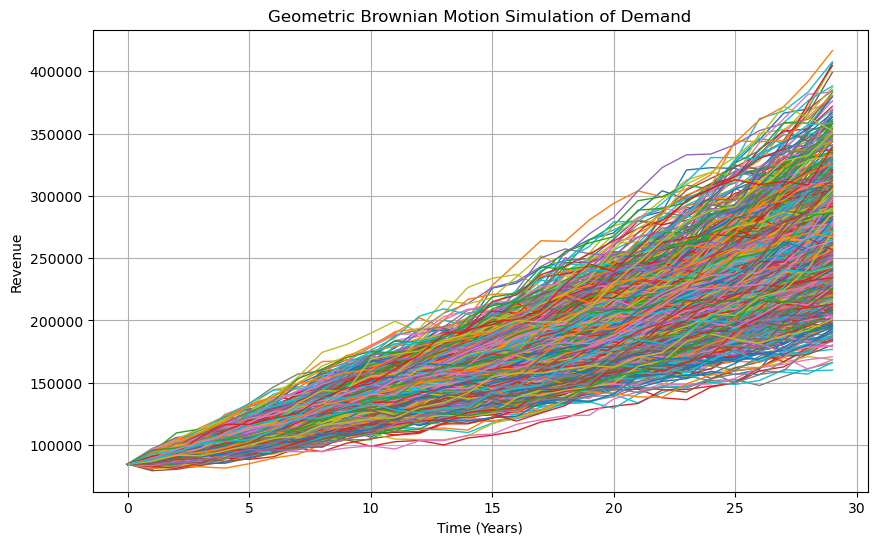

In [7]:
# Plot the paths
plt.figure(figsize=(10, 6))
for i in range(n_simulations):
    plt.plot(S[i], lw=1)
plt.title("Geometric Brownian Motion Simulation of Demand")
plt.xlabel("Time (Years)")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

In [8]:
distribution_npv = []

for simulation in range(0, len(S)) :
# NPV
    income_statement['Revenue'] = np.concatenate([np.zeros(5), S[simulation]])
    income_statement['EBITDA'] = income_statement['Revenue'] + income_statement['SG&A']
    income_statement['EBIT'] = income_statement['EBITDA'] + income_statement['Depreciation']
    income_statement['Tax'] = -income_statement['EBIT'] * tax_rate
    income_statement['NetIncome'] = income_statement['EBIT'] + income_statement['Tax']

    cash_flow['NetIncome'] = income_statement['NetIncome']
    cash_flow['Change_NWC'] = -income_statement['Revenue'].diff().fillna(0) * change_nwc
    # Revert NWC in last year
    cash_flow.loc[34, 'Change_NWC'] = -cash_flow['Change_NWC'].sum()

    cash_flow['CashFromOperations'] = cash_flow['NetIncome'] - cash_flow['Depreciation'] + cash_flow['Change_NWC']
    cash_flow['FreeCashFlow'] = cash_flow['CashFromOperations'] + cash_flow['CashFromInvesting']

    distribution_npv.append(npf.npv(wacc, cash_flow['FreeCashFlow']))

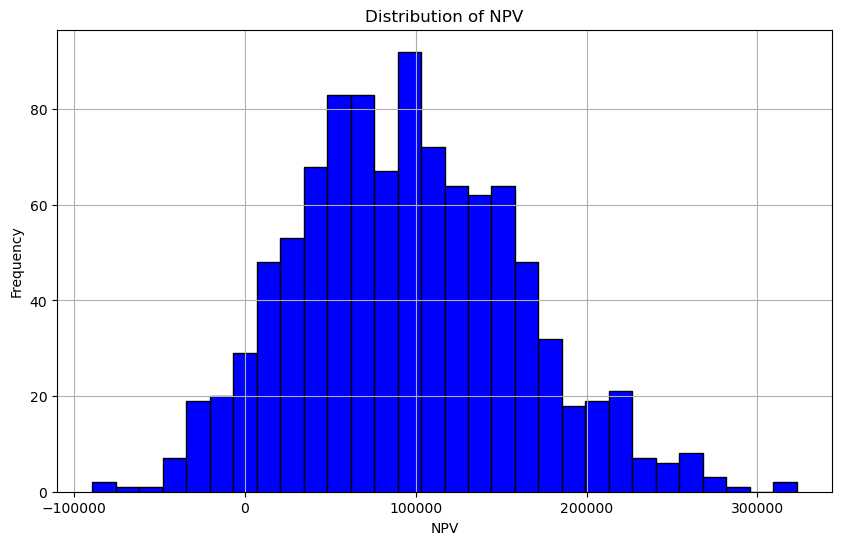

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(distribution_npv, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of NPV')
plt.xlabel('NPV')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Pricing Caps and Floors (Government Guarantees) 

In [10]:
## Function to calculate government outflows
#result = 0
#reference = 100

def government_outflow (result, reference):
    government = 0
    if result / reference < 0.8:
        government = (0.8 * reference - result) + 0.7 * (0.9 * reference - 0.8 * reference)
    elif result / reference < 0.9:
        government = 0.7 * (0.9 * reference -  result)
    elif result / reference > 1.2:
        government = (1.2 * reference - result) + 0.7 * (1.1 * reference - 1.2 * reference) 
    elif result / reference > 1.1:
        government = 0.7 * (1.1 * reference -  result)
    return government

In [11]:
distribution_npv_caps_floors = []

for simulation in range(0, len(S)) :
    cash_flow['CashFromInvesting'] = [-265105.0] + [-190665.0] + [-141039.0] + [-165852.0] + [-190665.0] + [11761.0]*30 # Soma 5 primeiras observações = 1.325 - 372,2 (investimento - apoio do governo) , Durante operação: 13,95 - 2,18 (Apoio do governo - reinvestimento)
# NPV
    income_statement['Revenue'] = np.concatenate([np.zeros(5), S[simulation]])
    income_statement['EBITDA'] = income_statement['Revenue'] + income_statement['SG&A']
    income_statement['EBIT'] = income_statement['EBITDA'] + income_statement['Depreciation']
    income_statement['Tax'] = -income_statement['EBIT'] * tax_rate
    income_statement['NetIncome'] = income_statement['EBIT'] + income_statement['Tax']

    cash_flow['NetIncome'] = income_statement['NetIncome']
    cash_flow['Change_NWC'] = -income_statement['Revenue'].diff().fillna(0) * change_nwc
    # Revert NWC in last year
    cash_flow.loc[34, 'Change_NWC'] = -cash_flow['Change_NWC'].sum()

    cash_flow['CashFromOperations'] = cash_flow['NetIncome'] - cash_flow['Depreciation'] + cash_flow['Change_NWC']

    # Government Cap and Floor
    for i in range(5, len(cash_flow['CashFromInvesting'])):
        government_guarantee = government_outflow(income_statement['Revenue'][i], revenue_reference['Revenue'][i])
        cash_flow.loc[i, 'CashFromInvesting'] = cash_flow.loc[i, 'CashFromInvesting'] + government_guarantee 

    cash_flow['FreeCashFlow'] = cash_flow['CashFromOperations'] + cash_flow['CashFromInvesting']

    distribution_npv_caps_floors.append(npf.npv(wacc, cash_flow['FreeCashFlow']))

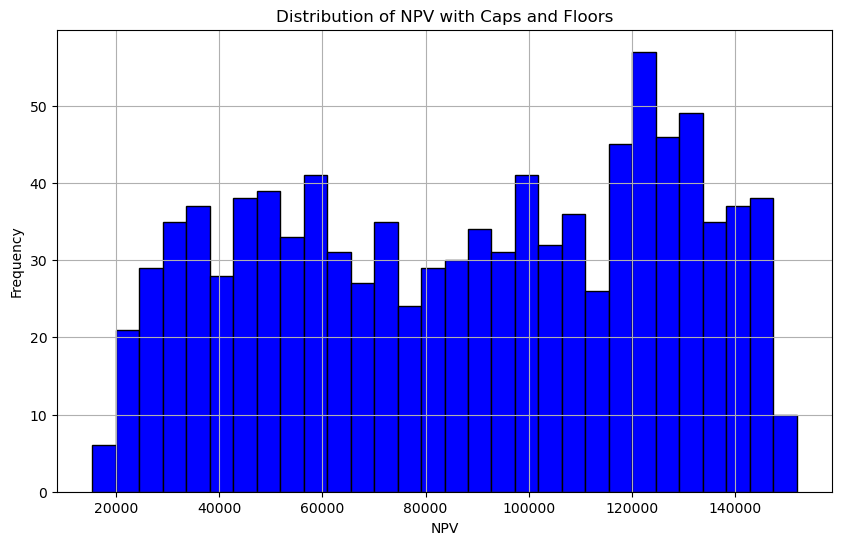

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(distribution_npv_caps_floors, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of NPV with Caps and Floors')
plt.xlabel('NPV')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
## Value of Option
average_npv = np.mean(distribution_npv)
average_npv_caps_floors = np.mean(distribution_npv_caps_floors)

value_option = average_npv_caps_floors - average_npv

print('Value without government guarantees:', average_npv)
print('Value with government guarantees:', average_npv_caps_floors)
print('Value of the Government Guarantees:', value_option)

Value without government guarantees: 94892.07712432349
Value with government guarantees: 87660.35973082445
Value of the Government Guarantees: -7231.717393499042


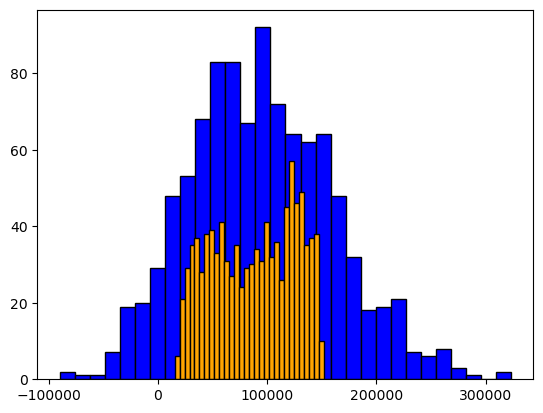

In [16]:
plt.hist(distribution_npv, bins=30, label='Without Guarantees', color='blue', edgecolor='black')
plt.hist(distribution_npv_caps_floors, bins=30, label='With Guarantees', color='orange',edgecolor='black')

plt.show()

In [ ]:
# Value at Risk

value_at_risk_95_without_guarantees = np.quantile(distribution_npv, 0.05)
value_at_risk_95_with_guarantees = np.quantile(distribution_npv_caps_floors, 0.05)

print("Value at Risk (95%) without guarantees:", value_at_risk_95_without_guarantees)
print("Value at Risk (95%) with guarantees:", value_at_risk_95_with_guarantees)

Value at Risk (95%) without guarantees: -6236.135696831002
Value at Risk (95%) with guarantees: 28525.84339130081
